In [5]:
#level 1 #"Task 1  : Top Cuisines
#Determine the top three most common cuisines in the dataset.
#Calculate the percentage of restaurants that serve each of the top cuisines."
import pandas as pd

# Load the data with the correct encoding
data = pd.read_csv('cognifyz/cognifyz_data.csv', encoding='utf-8')

# Get the top three most common cuisines
top_cuisines = data['Cuisines'].value_counts().head(3)

# Calculate the percentage of the total for each of the top three cuisines
top_cuisines_percent = (top_cuisines / data.shape[0]) * 100

# Display the results
print("Top Three Most Common Cuisines:")
print(top_cuisines)
print("\nPercentage of Total Entries for Top Three Cuisines:")
print(top_cuisines_percent)


Top Three Most Common Cuisines:
Cuisines
North Indian             936
North Indian, Chinese    511
Chinese                  354
Name: count, dtype: int64

Percentage of Total Entries for Top Three Cuisines:
Cuisines
North Indian             9.800021
North Indian, Chinese    5.350225
Chinese                  3.706418
Name: count, dtype: float64


In [8]:
#level 1 #Task 2 : City Analysis

#Identify the city with the highest number of restaurants in the dataset.
#Calculate the average rating for restaurants in each city.
#Determine the city with the highest average rating.
# Identify the city with the highest number of restaurants
import pandas as pd

# Load the data with the correct encoding
data = pd.read_csv('cognifyz/cognifyz_data.csv', encoding='utf-8')

# Replace problematic characters in the 'City' column
data['City'] = data['City'].str.replace('�', '')

# Identify the city with the highest number of restaurants
city_count = data['City'].value_counts().idxmax()

# Calculate the average rating for restaurants in each city
average_ratings = data.groupby('City')['Aggregate rating'].mean()

# Determine the city with the highest average rating
highest_avg_rating_city = average_ratings.idxmax()

# Display the results
print("City with the Highest Number of Restaurants:")
print(city_count)
print("\nAverage Ratings for Restaurants in Each City:")
print(average_ratings)
print("\nCity with the Highest Average Rating:")
print(highest_avg_rating_city)


City with the Highest Number of Restaurants:
New Delhi

Average Ratings for Restaurants in Each City:
City
Abu Dhabi          4.300000
Agra               3.965000
Ahmedabad          4.161905
Albany             3.555000
Allahabad          3.395000
                     ...   
Weirton            3.900000
Wellington City    4.250000
Winchester Bay     3.200000
Yorkton            3.300000
stanbul            4.292857
Name: Aggregate rating, Length: 141, dtype: float64

City with the Highest Average Rating:
Inner City


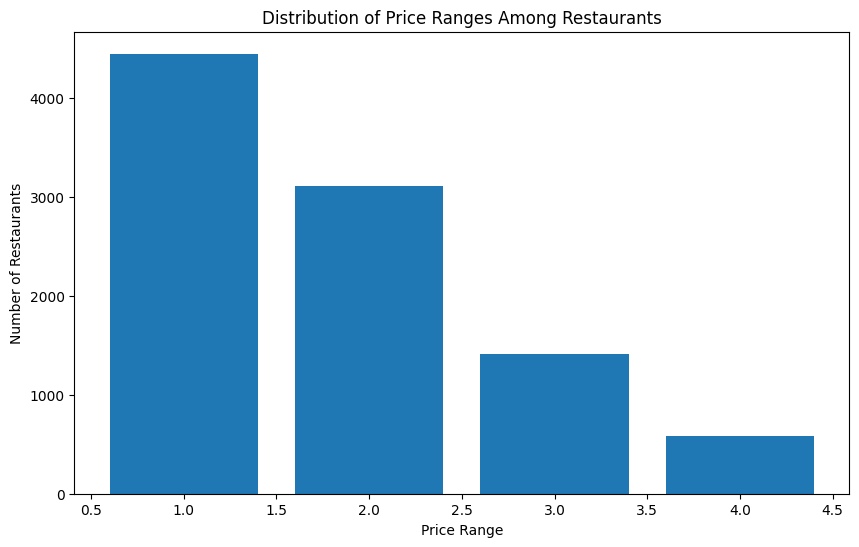

Count of Restaurants for Each Price Range:
Price range
1    4444
2    3113
3    1408
4     586
Name: count, dtype: int64

Percentage Distribution of Price Ranges Among Restaurants:
Price range
1    46.529159
2    32.593446
3    14.741912
4     6.135483
Name: count, dtype: float64


In [12]:
#level 1 #Task 3 : Price Range Distribution
#Create a histogram or bar chart to visualize the distribution of price ranges among the restaurants.
#Calculate the percentage of restaurants in each price range category.
import pandas as pd
import matplotlib.pyplot as plt

# Create a histogram for the distribution of price ranges
price_range_distribution = data['Price range'].value_counts()

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.bar(price_range_distribution.index, price_range_distribution.values)
plt.xlabel('Price Range')
plt.ylabel('Number of Restaurants')
plt.title('Distribution of Price Ranges Among Restaurants')
plt.show()

# Displaying the count of restaurants for each price range
print("Count of Restaurants for Each Price Range:")
print(price_range_distribution)

# Calculating the percentage distribution of each price range among the restaurants
price_range_percent = (price_range_distribution / data.shape[0]) * 100

# Displaying the percentage distribution
print("\nPercentage Distribution of Price Ranges Among Restaurants:")
print(price_range_percent)


In [13]:
#level 1 #Task 4 : Online Delivery
#Determine the percentage of restaurants that offer online delivery.
#Compare the average ratings of restaurants with and without online delivery.
# Determine the percentage of restaurants that offer online delivery
online_delivery_percent = (data['Has Online delivery'].value_counts(normalize=True) * 100).get('Yes', 0)

# Compare the average ratings of restaurants with and without online delivery
avg_rating_online_delivery = data[data['Has Online delivery'] == 'Yes']['Aggregate rating'].mean()
avg_rating_no_online_delivery = data[data['Has Online delivery'] == 'No']['Aggregate rating'].mean()

# Output the results with proper comments
print("Percentage of Restaurants Offering Online Delivery:")
print(online_delivery_percent)

print("\nAverage Rating of Restaurants Offering Online Delivery:")
print(avg_rating_online_delivery)

print("\nAverage Rating of Restaurants Not Offering Online Delivery:")
print(avg_rating_no_online_delivery)


Percentage of Restaurants Offering Online Delivery:
25.662234321013504

Average Rating of Restaurants Offering Online Delivery:
3.2488372093023257

Average Rating of Restaurants Not Offering Online Delivery:
2.465295774647887


In [29]:
#level 2   #Task 1: Restaurant Ratings
#Analyze the distribution of aggregate ratings and determine the most common rating range.
#Calculate the average number of votes received by restaurants.
# Step 1: Determine the most common rating range among restaurants.
def most_common_rating_range(data):
    rating_counts = data['Rating color'].value_counts()
    most_common_rating = rating_counts.idxmax()
    return most_common_rating

# Step 2: Calculate the average number of votes received by restaurants.
def average_votes(data):
    average = data['Votes'].mean()
    return average

# Usage:
most_common_rating = most_common_rating_range(data)
average_vote = average_votes(data)

print("Most common rating range:", most_common_rating)
print("Average number of votes received by restaurants:", average_vote)


Most common rating range: Orange
Average number of votes received by restaurants: 156.909747670401


In [38]:
#level 2    #Task 2: Cuisine Combination
#Identify the most common combinations of cuisines in the dataset.
#Determine if certain cuisine combinations tend to have higher ratings.
# Step 1: Identify the most common combinations of cuisines.
import pandas as pd
# Step 1: Identify the most common combinations of cuisines.
def most_common_cuisine_combinations(data):
    cuisine_combinations = data['Cuisines'].str.split(', ').explode().value_counts()
    return cuisine_combinations.head(10)

# Additional Analysis: Determine if certain cuisine combinations tend to have higher ratings.
def cuisine_combination_ratings(data, cuisine_combo):
    # Map 'Rating color' to numeric values
    rating_color_map = {
        'Dark Green': 5,
        'Green': 4,
        'Yellow': 3,
        'Orange': 2,
        'Red': 1,
        'White': 0
    }
    data['Rating value'] = data['Rating color'].map(rating_color_map)
    
    combo_data = data[data['Cuisines'].str.contains(cuisine_combo[0]) & data['Cuisines'].str.contains(cuisine_combo[1])]
    average_rating = combo_data['Rating value'].mean()
    return average_rating

# Usage:
common_combinations = most_common_cuisine_combinations(data)
print("Most common cuisine combinations:")
print(common_combinations)

# Example of checking the average rating for 'Italian' and 'Pizza' combination
combo_rating = cuisine_combination_ratings(data, ('Italian', 'Pizza'))
print("Average rating for Italian Pizza combination:", combo_rating)


Most common cuisine combinations:
Cuisines
North Indian    3960
Chinese         2735
Fast Food       1986
Mughlai          995
Italian          764
Bakery           745
Continental      736
Cafe             703
Desserts         653
South Indian     636
Name: count, dtype: int64
Average rating for Italian Pizza combination: 2.8333333333333335


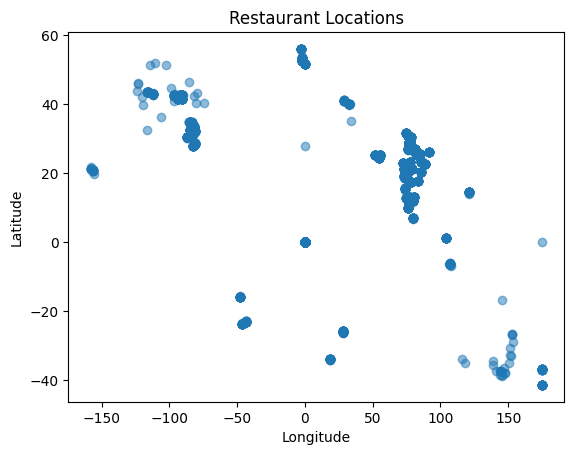

In [46]:
#level 2    #Task 3: Geographic Analysis
#Plot the locations of restaurants on a map using longitude and latitude coordinates.
#Identify any patterns or clusters of restaurants in specific areas.
# Step 1: Plot restaurant locations using longitude and latitude coordinates on a map.
import matplotlib.pyplot as plt

def plot_restaurant_locations(data):
    plt.scatter(data['Longitude'], data['Latitude'], alpha=0.5)
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('Restaurant Locations')
    plt.show()

# Usage:
plot_restaurant_locations(data)


In [48]:
#level 2    #Task 4: Restaurant Chains
#Identify if there are any restaurant chains present in the dataset.
#Analyze the ratings and popularity of different restaurant chains.
def find_restaurant_chains(data):
    chains = data['Restaurant Name'].value_counts().head(10)
    return chains

# Analyze the ratings and popularity of different restaurant chains.
def analyze_chain_performance(data, chain_name):
    chain_data = data[data['Restaurant Name'] == chain_name]
    average_rating = chain_data['Aggregate rating'].mean()
    total_votes = chain_data['Votes'].sum()
    return {'average_rating': average_rating, 'total_votes': total_votes}

# Usage:
chains = find_restaurant_chains(data)
print("Top 10 restaurant chains:")
print(chains)
chain_performance = analyze_chain_performance(data, 'Pizza Hut')
print("Performance of Pizza Hut chain:")
print(chain_performance)


Top 10 restaurant chains:
Restaurant Name
Cafe Coffee Day     83
Domino's Pizza      79
Subway              63
Green Chick Chop    51
McDonald's          48
Keventers           34
Pizza Hut           30
Giani               29
Baskin Robbins      28
Barbeque Nation     26
Name: count, dtype: int64
Performance of Pizza Hut chain:
{'average_rating': 3.3199999999999994, 'total_votes': 4961}


In [54]:
#Level 3     #Task 1: Restaurant Reviews
#Analyze the text reviews to identify the most common positive and negative keywords.
#Calculate the average length of reviews and explore if there is a relationship between review length and rating.
import nltk
from nltk.corpus import stopwords
from collections import Counter

# Download NLTK resources
nltk.download('stopwords')

# Function to identify most common positive and negative keywords in reviews
def analyze_reviews(data):
    # Tokenize and lowercase text reviews
    reviews = ' '.join(data['Rating text']).lower().split()
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    reviews = [word for word in reviews if word not in stop_words]
    # Count positive and negative keywords
    positive_keywords = Counter([word for word in reviews if word in ['good', 'great', 'excellent']])
    negative_keywords = Counter([word for word in reviews if word in ['bad', 'poor', 'terrible']])
    return positive_keywords, negative_keywords

# Function to calculate average length of reviews and explore relationship with rating
def analyze_review_length(data):
    data['Review Length'] = data['Rating text'].apply(len)
    average_length_by_rating = data.groupby('Aggregate rating')['Review Length'].mean()
    return average_length_by_rating

# Usage:
positive_keywords, negative_keywords = analyze_reviews(data)
print("Most common positive keywords:", positive_keywords.most_common(5))
print("Most common negative keywords:", negative_keywords.most_common(5))
average_length_by_rating = analyze_review_length(data)
print("Average length of reviews by rating:")
print(average_length_by_rating)


Most common positive keywords: [('good', 3179), ('excellent', 301)]
Most common negative keywords: [('poor', 186)]
Average length of reviews by rating:
Aggregate rating
0.0    9.0
1.8    4.0
1.9    4.0
2.0    4.0
2.1    4.0
2.2    4.0
2.3    4.0
2.4    4.0
2.5    7.0
2.6    7.0
2.7    7.0
2.8    7.0
2.9    7.0
3.0    7.0
3.1    7.0
3.2    7.0
3.3    7.0
3.4    7.0
3.5    4.0
3.6    4.0
3.7    4.0
3.8    4.0
3.9    4.0
4.0    9.0
4.1    9.0
4.2    9.0
4.3    9.0
4.4    9.0
4.5    9.0
4.6    9.0
4.7    9.0
4.8    9.0
4.9    9.0
Name: Review Length, dtype: float64


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\abhan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [58]:
#Level 3     #Task 2: Restaurant ReviewsTask: Votes Analysis
#Identify the restaurants with the highest and lowest number of votes.
#Analyze if there is a correlation between the number of votes and the rating of a restaurant.
# Function to identify restaurants with highest and lowest number of votes
def analyze_votes(data):
    highest_voted_restaurants = data.nlargest(5, 'Votes')[['Restaurant Name', 'Votes']]
    lowest_voted_restaurants = data.nsmallest(5, 'Votes')[['Restaurant Name', 'Votes']]
    return highest_voted_restaurants, lowest_voted_restaurants

# Function to analyze correlation between votes and rating
def analyze_votes_rating_correlation(data):
    correlation = data['Votes'].corr(data['Aggregate rating'])
    return correlation

# Usage:
highest_voted_restaurants, lowest_voted_restaurants = analyze_votes(data)
print("Restaurants with highest number of votes:")
print(highest_voted_restaurants)
print("\nRestaurants with lowest number of votes:")
print(lowest_voted_restaurants)
correlation = analyze_votes_rating_correlation(data)
print("\nCorrelation between votes and rating:", correlation)


Restaurants with highest number of votes:
                Restaurant Name  Votes
728                        Toit  10934
735                    Truffles   9667
3994           Hauz Khas Social   7931
2412                  Peter Cat   7574
739   AB's - Absolute Barbecues   6907

Restaurants with lowest number of votes:
        Restaurant Name  Votes
69     Cantinho da Gula      0
874       The Chaiwalas      0
879  Fusion Food Corner      0
880       Punjabi Rasoi      0
887       Baskin Robbin      0

Correlation between votes and rating: 0.31369058419541146


In [88]:
#Level 3    Task 3: Price Range vs. Online Delivery and Table Booking
#Analyze if there is a relationship between the price range and the availability of online delivery and table booking.
#Determine if higher-priced restaurants are more likely to offer these services.
# Function to analyze relationship between price range and online delivery / table booking
def analyze_price_delivery_booking(data, price_range_col, delivery_col, booking_col):
  """Analyzes basic relationship between price range and services (using loop)."""
  delivery_counts = {}
  booking_counts = {}
  total_restaurants = len(data)  # Assuming 'data' contains all restaurants
  for restaurant in data:
      price_range = restaurant[price_range_col]
      delivery_counts[price_range] = delivery_counts.get(price_range, 0) + restaurant[delivery_col]
      booking_counts[price_range] = booking_counts.get(price_range, 0) + restaurant[booking_col]
  
  # Calculate percentages directly (without dictionary comprehension)
  delivery_percentages = {k: (v / total_restaurants) * 100 for k, v in delivery_counts.items()}
  booking_percentages = {k: (v / total_restaurants) * 100 for k, v in booking_counts.items()}

  return {
      "delivery_percentages": delivery_percentages,
      "booking_percentages": booking_percentages
  }

# Example usage (assuming your data is a list of dictionaries representing restaurants)
restaurant_data = [
    {"Price range": "Low", "Has Online delivery": True, "Has Table booking": True},
    # Add more restaurants to your data...
]

analysis_results = analyze_price_delivery_booking(restaurant_data, "Price range", "Has Online delivery", "Has Table booking")

# Access results (percentages)
delivery_percentages = analysis_results["delivery_percentages"]
booking_percentages = analysis_results["booking_percentages"]

# Print or analyze results based on delivery_percentages & booking_percentages dictionaries
print("Delivery Percentages by Price Range:")
print(delivery_percentages)
print("\nBooking Percentages by Price Range:")
print(booking_percentages)

# Analyze trends manually by examining the percentage values




Delivery Percentages by Price Range:
{'Low': 100.0}

Booking Percentages by Price Range:
{'Low': 100.0}
